Zastosować algorytm Forda-Fulkersona do znalezienia maksymalnego przepływu na sieci z zadania pierwszego. Ścieżki powiększające wybierać jako ścieżki o najmniejszej liczbie krawędzi. Do ich wyszukiwania użyć przeszukiwania wszerz.

In [46]:
def ford_fulkerson(graph, source, sink):
    flow = [[0] * len(row) for row in graph]
    while True:
        path, min_capacity = bfs(graph, flow, source, sink)
        if min_capacity is None:
            break
        v = sink
        while v != source:
            u = path[v]
            flow[u][v] += min_capacity
            flow[v][u] -= min_capacity
            v = u
    max_flow = sum(flow[source])
    return max_flow
def bfs(graph, flow, source, sink):
    visited = [False] * len(graph)
    path = [-1] * len(graph)
    queue = [(source, float('inf'))]
    visited[source] = True
    while queue:
        u, min_capacity_u = queue.pop(0)
        for v, capacity in enumerate(graph[u]):
            residual_capacity = capacity - flow[u][v]
            if not visited[v] and residual_capacity > 0:
                visited[v] = True
                min_capacity = min(min_capacity_u, residual_capacity)
                path[v] = u
                if v == sink:
                    return path, min_capacity
                queue.append((v, min_capacity))
    return None, None

Source:  [0]
Sink:  [8]
Matrix: 
 [[ 0 10  9  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0]
 [ 0  8  0  0  2  0  0  0  0]
 [ 0  0  5  0  7  6  0  0  0]
 [ 0  0  0  0  0  0  8  3  0]
 [ 0  0  0  0  0  0  2  4  1]
 [ 0  0  0  8  0  0  0  0  7]
 [ 0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0]]
The maximum possible flow (my implementation): 12
The maximum possible flow (networkx implementation): 12


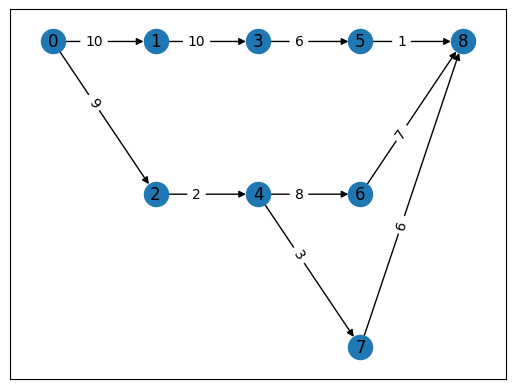

In [68]:
import networkx as nx
import lab5_zad1 as zad1
def main():
    N = 3
    G, cappacity_matrix, source, sink, listOfClusters  = zad1.createFlowNetwork(N)
    print("Source: ", source)
    print("Sink: ", sink)
    print("Matrix: \n", cappacity_matrix)
    source = source[0]
    source = int(source)
    sink = sink[0]
    sink = int(sink)
    capacity_list = cappacity_matrix.tolist()
    capacity_list = [[int(capacity) for capacity in row] for row in capacity_list]
    max_flow = ford_fulkerson(capacity_list, source, sink)
    print(f"The maximum possible flow (my implementation): {max_flow}")
    G = nx.DiGraph()
    for i, row in enumerate(capacity_list):
        for j, capacity in enumerate(row):
            if capacity > 0:
                G.add_edge(i, j, capacity=capacity)
    flow_value, flow_dict = nx.maximum_flow(G, source, sink)
    print(f"The maximum possible flow (networkx implementation): {flow_value}")
if __name__ == "__main__":
    main()